In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
my_data = pd.read_csv('/content/drive/MyDrive/project/police_killings.csv')
state_sum = my_data.groupby(['State', "Victim's race"]).count()
state_sum['City'].head(2)

State  Victim's race
AK     Black            5
       Hispanic         1
Name: City, dtype: int64

Create a function to allow for all state symbols to be input:

In [4]:
import matplotlib.pyplot as plt
def create_pie_chart(input_df, state):
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = input_df.loc[state]["Victim's name"].index
    sizes = input_df.loc[state]["Victim's name"]
    
    explode_len = len(input_df.loc[state]["Victim's name"].index)
    zero_list = [0]*explode_len
    if input_df.loc[state]["Victim's name"].index[0] == 'Black':
        zero_list[0] = 0.2
    elif input_df.loc[state]["Victim's name"].index[1] == 'Black':
        zero_list[1] = 0.2
    elif input_df.loc[state]["Victim's name"].index[2] == 'Black':
        zero_list[2] = 0.2
        
    explode = tuple(zero_list)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=180)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Police Killings by Race as Percentage')
    return plt.show()

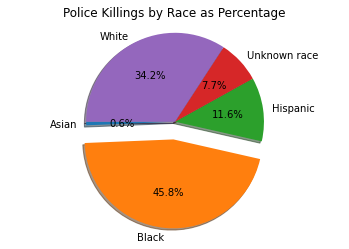

In [6]:
create_pie_chart(state_sum, 'NY')

In [7]:
my_data2 = pd.read_excel('/content/drive/MyDrive/project/Demographic_by_state.xlsx')

Index the dataset by states and rename the columns for ease of use:

In [8]:
my_data2 = my_data2.set_index('State')
my_data2 = my_data2.rename(columns = {'Hispanic (of any race)' : 'Hispanic', 'Non-Hispanic White' : 'White', 'Non-Hispanic Black' : 'Black', 'Non-Hispanic Asian' : 'Asian', 'Non-Hispanic American Indian' : 'Native American'})
my_data2 = my_data2.sort_index()
my_data2.head()

,Total population,Hispanic,White,Black,Asian,Native American
State,,,,,,
AK,739795,51712,448081,21192,48569,105146
AL,4874747,201970,3191450,1302295,65494,22209
AR,3004279,223764,2173307,455500,46583,16901
AZ,7016270,2202173,3836639,290379,225810,274496
CA,39536653,15477306,14616636,2164239,5679986,147880


Identify and pull out the hispanic data for police killings for each state:

In [9]:
my_data.columns
my_data["Victim's race"].unique()
hispanic_data = my_data[my_data["Victim's race"] == 'Hispanic']
hispanic_data.head()
sorted_hm = hispanic_data[["Victim's name", 'State']]
hispanic_group = sorted_hm.groupby('State')["Victim's name"].nunique()
hispanic_df = hispanic_group.to_frame()
hispanic_df = hispanic_df.rename(columns = {"Victim's name" : 'Hispanic Police Killings'})
hispanic_df.head()

,Hispanic Police Killings
State,
AK,1
AR,3
AZ,114
CA,469
CO,67


Create a function to save myself time for each race:

In [10]:
def pull_race_data(data, race):
    new_data = data[data["Victim's race"] == race]
    sort_data = new_data[["Victim's name", "State"]]
    data_grouped = sort_data.groupby('State')["Victim's name"].nunique()
    data_df = data_grouped.to_frame()
    data_df = data_df.rename(columns = {"Victim's name" : race + ' Police Killings'})
    return data_df

In [11]:
black_df = pull_race_data(my_data, 'Black')
white_df = pull_race_data(my_data, 'White')
native_df = pull_race_data(my_data, 'Native American')
other_df = pull_race_data(my_data, 'Unknown race')

Pull the total killings per state:

In [12]:
police_killing_total = my_data[["Victim's name", 'State']]
murder_state_total = police_killing_total.groupby('State')["Victim's name"].nunique()
murder_total_df = murder_state_total.to_frame()
murder_total_df = murder_total_df.rename(columns = {"Victim's name" : 'Total Police Killings'})
murder_total_df.head()

,Total Police Killings
State,
AK,41
AL,136
AR,103
AZ,338
CA,1123


Combine all my data into single DataFrames to be used for the graphics:

In [13]:
hispanic_df['Total Police Killings'] = murder_total_df['Total Police Killings']
hispanic_df[['Hispanic Population', 'Total State Pop']] = my_data2[['Hispanic', 'Total population']]

black_df['Total Police Killings'] = murder_total_df['Total Police Killings']
black_df[['Black Population', 'Total State Pop']] = my_data2[['Black', 'Total population']]

white_df['Total Police Killings'] = murder_total_df['Total Police Killings']
white_df[['White Population', 'Total State Pop']] = my_data2[['White', 'Total population']]

native_df['Total Police Killings'] = murder_total_df['Total Police Killings']
native_df[['Native American Population', 'Total State Pop']] = my_data2[['Native American', 'Total population']]



In [14]:
native_df.head()

,Native American Police Killings,Total Police Killings,Native American Population,Total State Pop
State,,,,
AK,12,41,105146,739795
AZ,14,338,274496,7016270
CA,7,1123,147880,39536653
CO,5,218,32102,5607154
ID,2,48,19136,1716943


Create the police killing percentage column for each population, and create the column for population as a percentage for each state

In [15]:
hispanic_df['Hispanic PK as Percentage'] = 100*(hispanic_df['Hispanic Police Killings'] / hispanic_df['Total Police Killings'])
white_df['White PK as Percentage'] = 100*(white_df['White Police Killings'] / white_df['Total Police Killings'])
black_df['Black PK as Percentage'] = 100*(black_df['Black Police Killings'] / black_df['Total Police Killings'])
native_df['Native PK as Percentage'] = 100*(native_df['Native American Police Killings'] / native_df['Total Police Killings'])

In [16]:
native_df.head()

,Native American Police Killings,Total Police Killings,Native American Population,Total State Pop,Native PK as Percentage
State,,,,,
AK,12,41,105146,739795,29.268293
AZ,14,338,274496,7016270,4.142012
CA,7,1123,147880,39536653,0.623330
CO,5,218,32102,5607154,2.293578
ID,2,48,19136,1716943,4.166667


In [17]:
hispanic_df['Hispanic Pop as Percentage'] = 100*(hispanic_df['Hispanic Population'] / hispanic_df['Total State Pop'])
white_df['White Pop as Percentage'] = 100*(white_df['White Population'] / white_df['Total State Pop'])
black_df['Black Pop as Percentage'] = 100*(black_df['Black Population'] / black_df['Total State Pop'])
native_df['Native Pop as Percentage'] = 100*(native_df['Native American Population'] / native_df['Total State Pop'])

In [18]:
native_df.head()

,Native American Police Killings,Total Police Killings,Native American Population,Total State Pop,Native PK as Percentage,Native Pop as Percentage
State,,,,,,
AK,12,41,105146,739795,29.268293,14.212856
AZ,14,338,274496,7016270,4.142012,3.912278
CA,7,1123,147880,39536653,0.623330,0.374033
CO,5,218,32102,5607154,2.293578,0.572519
ID,2,48,19136,1716943,4.166667,1.114539


In [19]:
Compare_perc_df = pd.DataFrame([hispanic_df['Hispanic PK as Percentage'], hispanic_df['Hispanic Pop as Percentage'], white_df['White PK as Percentage'], white_df['White Pop as Percentage'], black_df['Black PK as Percentage'], black_df['Black Pop as Percentage'], native_df['Native PK as Percentage'],  native_df['Native Pop as Percentage']])
Compare_perc_df = Compare_perc_df.transpose()
Compare_perc_df = Compare_perc_df.fillna(0)

In [20]:
Compare_perc_df.head()

,Hispanic PK as Percentage,Hispanic Pop as Percentage,White PK as Percentage,White Pop as Percentage,Black PK as Percentage,Black Pop as Percentage,Native PK as Percentage,Native Pop as Percentage
State,,,,,,,,
AK,2.439024,6.990045,36.585366,60.568266,12.195122,2.864577,29.268293,14.212856
AR,2.912621,7.448176,57.281553,72.340385,27.184466,15.161708,0.000000,0.000000
AZ,33.727811,31.386663,41.715976,54.682032,9.171598,4.138652,4.142012,3.912278
CA,41.763134,39.146728,29.474622,36.969837,16.384684,5.474007,0.623330,0.374033
CO,30.733945,21.521150,44.495413,68.163903,9.633028,3.914642,2.293578,0.572519


Now that everything is in a single DataFrame to play with, identifying the states with the worst difference for black individuals is identified:

In [21]:
highest_diff_b = pd.DataFrame([Compare_perc_df['Black PK as Percentage'] - Compare_perc_df['Black Pop as Percentage']]).transpose()

In [22]:
highest_diff_b.sort_values(0, ascending = False).head()

,0
State,
RI,44.602313
DC,43.113167
IL,39.347169
NJ,37.248874
MD,33.143753


Those 5 states are used for comparison in the pie charts:

In [23]:
RI_compare = Compare_perc_df.loc['RI']
DC_compare = Compare_perc_df.loc['DC']
IL_compare = Compare_perc_df.loc['IL']
NJ_compare = Compare_perc_df.loc['NJ']
MD_compare = Compare_perc_df.loc['MD']


Function for multiple pie charts is created for ease of comparison:

In [24]:
import matplotlib.pyplot as plt
def create_pie_charts(input_list, state):
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Hispanic', 'White', 'Black', 'Native American'
    sizes1 = input_list[[0, 2, 4, 6]]
    sizes2 = input_list[[1, 3, 5, 7]]
    explode = (0, 0, 0.3, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.pie(sizes1, explode = explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=150)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.pie(sizes2, explode = explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=150)
    ax2.axis('equal')
    ax1.set_title('Police Murder Rate as Percentage', fontsize = 10)
    ax2.set_title('Population as Percentage', fontsize = 10)
    fig.suptitle(state)
    
    fig.savefig(state + '_Police.png')
    return plt.show()

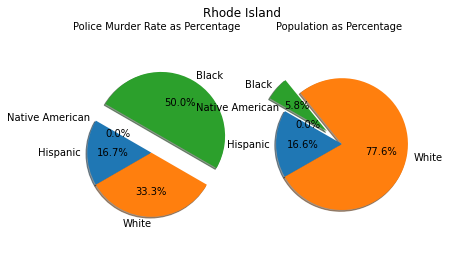

In [25]:
create_pie_charts(RI_compare, 'Rhode Island')

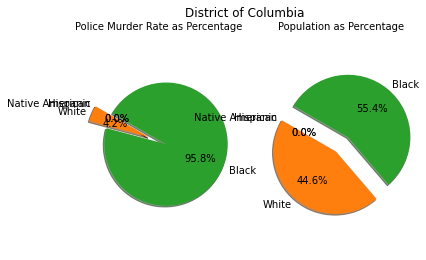

In [26]:
create_pie_charts(DC_compare, 'District of Columbia')

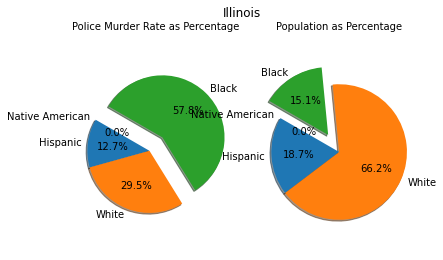

In [27]:
create_pie_charts(IL_compare, 'Illinois')

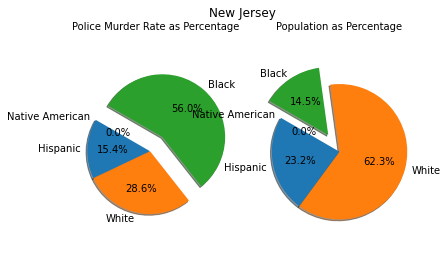

In [28]:
create_pie_charts(NJ_compare, 'New Jersey')

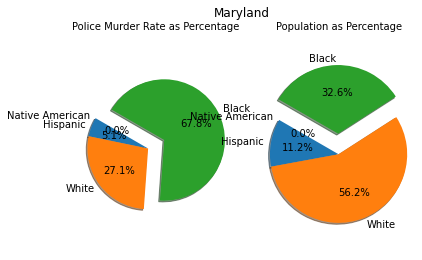

In [29]:
create_pie_charts(MD_compare, 'Maryland')

Now an attempt to compare across all states at once using each police killings per 100,000 in each population with a simple function:

In [30]:
def per_100000(population_cleaned, race):
    _per_100000 = 100000*(population_cleaned[race + ' Police Killings'] / population_cleaned[race + ' Population'])
    return _per_100000

In [31]:
native_per_100k = per_100000(native_df, 'Native American')
black_per_100k = per_100000(black_df, 'Black')
white_per_100k = per_100000(white_df, 'White')
hispanic_per_100k = per_100000(hispanic_df, 'Hispanic')


Combine all the data into a single DataFrame to be manipulated in pandas and later used for numpy graphics. Some data is missing for certain demographics for each state so NaN values are replaced with 0:

In [32]:
compare_per_100k = pd.DataFrame([native_per_100k, white_per_100k, black_per_100k, hispanic_per_100k]).transpose()
compare_per_100k = compare_per_100k.rename(columns = {0: 'Native American', 1: 'White', 2:'Black', 3:'Hispanic'})
compare_per_100k = compare_per_100k.fillna(0)
compare_per_100k.head()

,Native American,White,Black,Hispanic
State,,,,
AK,11.412702,3.347609,23.593809,1.933787
AZ,5.100256,3.675092,10.675703,5.176705
CA,4.733568,2.264543,8.501834,3.030243
CO,15.575354,2.537902,9.567198,5.552222
ID,10.451505,2.558086,9.134923,2.808739


Sort the data based upon the state abbreviation for easy readability:

In [33]:
compare_per_100k = compare_per_100k.sort_index()
compare_per_100k.head()

,Native American,White,Black,Hispanic
State,,,,
AK,11.412702,3.347609,23.593809,1.933787
AL,0.000000,2.287362,3.916163,0.000000
AR,0.000000,2.714757,6.147091,1.340698
AZ,5.100256,3.675092,10.675703,5.176705
CA,4.733568,2.264543,8.501834,3.030243


Create a graphics comparing Police killings per 100,000 individuals for each population by state:

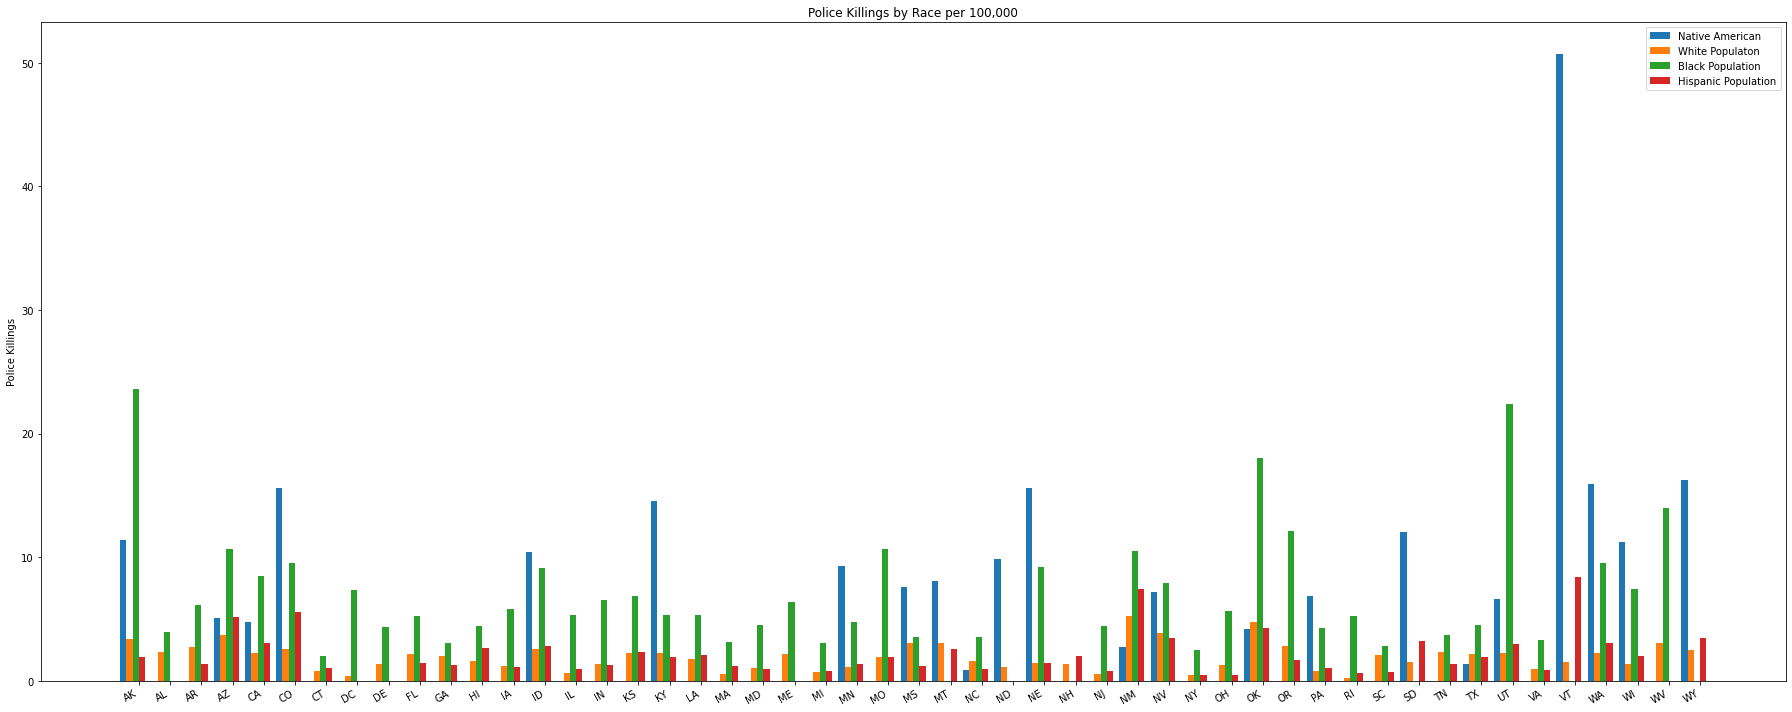

In [34]:
import numpy as np
per_ten = compare_per_100k[['Native American',
                      'White', 'Black', 'Hispanic']]

x = np.arange(len(per_ten))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
i = 0
for elt in per_ten.columns:
    barplot = ax.bar(x + width/2 + (i-3)*width, per_ten[elt], width)
    i+=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Police Killings')
ax.set_title('Police Killings by Race per 100,000')
ax.set_xticks(x)
ax.set_xticklabels(per_ten.index, rotation=30, horizontalalignment='right')
ax.legend(['Native American', 'White Populaton', 'Black Population', 'Hispanic Population'])

fig.tight_layout()

plt.show()

In some states the population for Native Americans is so low, that a single police killing can result in a very skewed per 100,000 individuals (e.g. in Vermont only 1 Native American was killed between 2015 and 2020, but the population of Native Americans in Vermont is less than 2,000 thus it results in a massive spike per 100,000 individuals). I removed Native Americans for the last graph just to give another perspective when comparing between Black individuals, White individuals and Hispanic individuals.

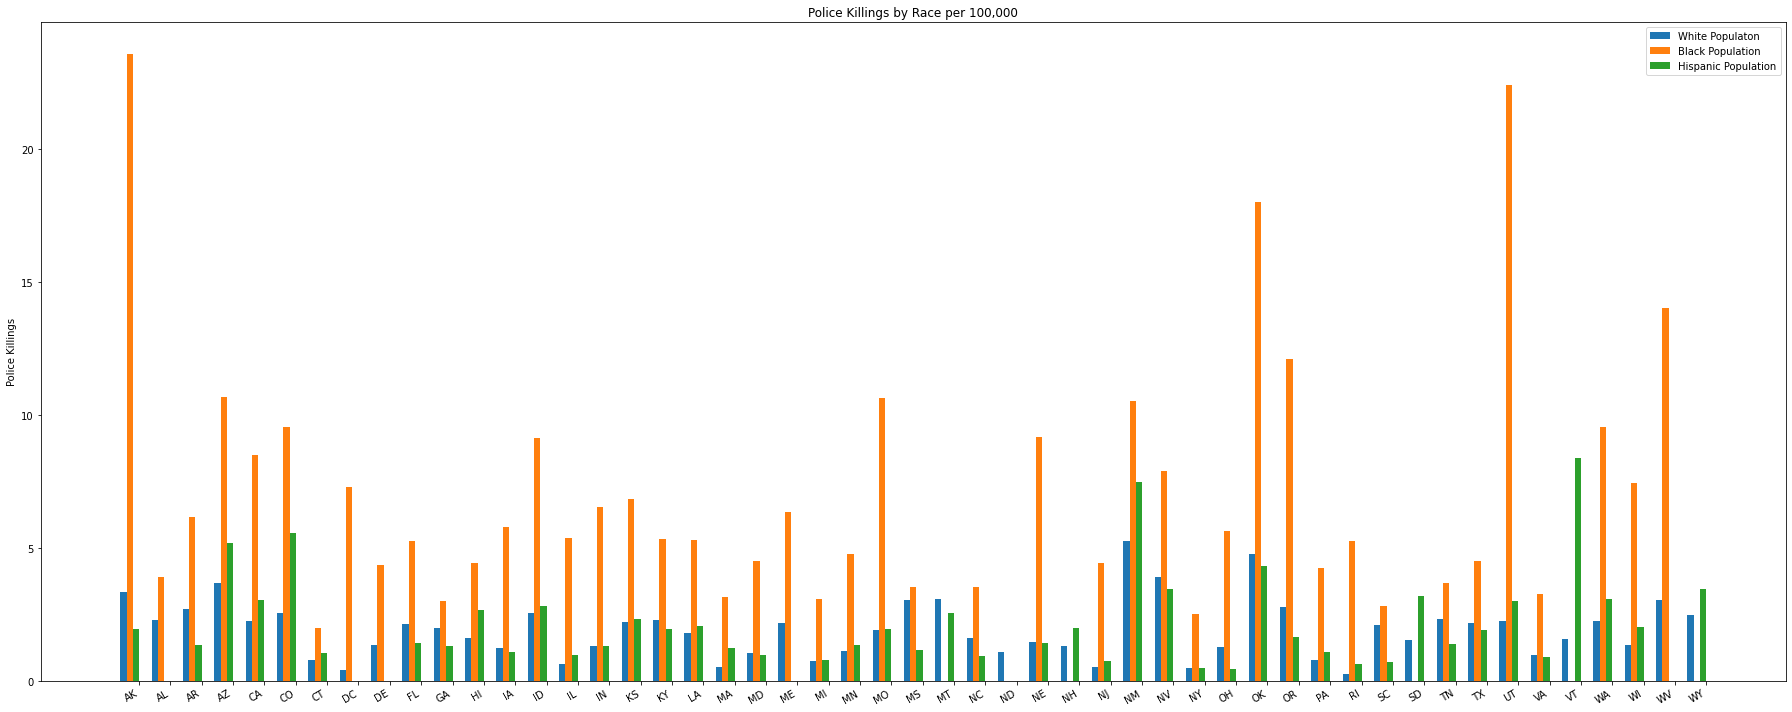

In [35]:
import numpy as np
per_ten = compare_per_100k[['White', 'Black', 'Hispanic']]

x = np.arange(len(per_ten))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
i = 0
for elt in per_ten.columns:
    barplot = ax.bar(x + width/2 + (i-3)*width, per_ten[elt], width)
    i+=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Police Killings')
ax.set_title('Police Killings by Race per 100,000')
ax.set_xticks(x)
ax.set_xticklabels(per_ten.index, rotation=30, horizontalalignment='right')
ax.legend(['White Populaton', 'Black Population', 'Hispanic Population'])

fig.tight_layout()

plt.show()